In [67]:
import pandas as pd
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [8]:
# Loading the dataset
df = pd.read_csv("CompanyReviews.csv")

In [9]:
df.head()

,Unnamed: 0,review_description,rating,company
0,0,رائع,1,talbat
1,1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1,talbat
2,2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat
3,3,لماذا لا يمكننا طلب من ماكدونالدز؟,-1,talbat
4,4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,-1,talbat


In [10]:
df.shape

(40046, 4)

In [11]:
df['rating'].value_counts()

rating
 1    23921
-1    14200
 0     1925
Name: count, dtype: int64

In [12]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
fig = go.Figure(data=[go.Pie(labels=["postive","negative","neutral"],values=[df.rating[df.rating==x].count() for x in df.rating.unique()],pull=[0, 0.1, 0])])
fig.update_layout(title='Ratings')
iplot(fig)

In [13]:
fig=go.Figure(data=[go.Pie(labels=df.company.unique(),values=df.company.value_counts(),hole=0.5)])
iplot(fig)

In [14]:
df2=df.copy()
df2.rating=df.rating.map({1:"postive",-1:"negative",0:"neutral"})

In [15]:
import plotly.express as px
fig=px.sunburst(df2,path=["company","rating"],title="Companies and Feedbacks", color_continuous_scale='RdBu',color="rating")
fig.update_traces(textinfo='label + percent parent')
fig.show()

In [16]:
!pip install arabic-reshaper

In [17]:
!pip install python-bidi

# **clean data**

In [18]:
# Check if there is null value
df.isnull().sum()

Unnamed: 0            0
review_description    1
rating                0
company               0
dtype: int64

In [19]:
# Drop the null values
df.dropna(subset=['review_description'], inplace=True)

In [20]:
df.isnull().sum()

Unnamed: 0            0
review_description    0
rating                0
company               0
dtype: int64

In [21]:
df.shape

(40045, 4)

In [22]:
df.review_description.duplicated().sum()

1042

In [23]:
df.drop(df[df.review_description.duplicated() == True].index, axis = 0, inplace = True)

In [24]:
df.drop(columns=["Unnamed: 0"],inplace=True)
df.head()

,review_description,rating,company
0,رائع,1,talbat
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1,talbat
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat
3,لماذا لا يمكننا طلب من ماكدونالدز؟,-1,talbat
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,-1,talbat


# **preprocessing**

In [25]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('arabic'))
print(stop_words)

{'فرادى', 'تَيْنِ', 'إياك', 'علم', 'عوض', 'دال', 'هاته', 'ذواتي', 'أمامك', 'اللتيا', 'ذات', 'أمس', 'أبدا', 'أيّ', 'حبذا', 'تحت', 'صهْ', 'فلا', 'إليكنّ', 'مكانَك', 'همزة', 'قرش', 'خال', 'سبعة', 'ثمانمئة', 'ين', 'تسعة', 'آذار', 'لي', 'لستن', 'جمعة', 'هلّا', 'حتى', 'ولكن', 'عن', 'فاء', 'ست', 'مكانكم', 'ذا', 'صاد', 'ثامن', 'ساء', 'مادام', 'هَيْهات', 'عشر', 'أجمع', 'أى', 'يناير', 'ستمائة', 'أربعمائة', 'منه', 'هيهات', 'أنتم', 'ورد', 'نحن', 'أنا', 'هَذِي', 'ثمانين', 'خاء', 'الآن', 'يا', 'أفريل', 'طفق', 'بعد', 'بغتة', 'ستون', 'ذلك', 'سرعان', 'أف', 'كأيّ', 'تين', 'كأين', 'حيَّ', 'هَاتِي', 'بك', 'قاطبة', 'ديسمبر', 'ذاك', 'حين', 'لا', 'إلّا', 'لسن', 'وراءَك', 'ب', 'مساء', 'هيّا', 'بل', 'تلكما', 'طرا', 'كاد', 'آمينَ', 'أصلا', 'استحال', 'يوان', 'بات', 'ز', 'إذ', 'أقبل', 'أنت', 'خمسون', 'قلما', 'لدى', 'رابع', 'ثم', 'هاتين', 'كانون', 'ثمانية', 'راح', 'اخلولق', 'هل', 'سبعمائة', 'سبت', 'فمن', 'ترك', 'حمٌ', 'آهٍ', 'إن', 'ذي', 'أقل', 'والذين', 'ذ', 'لو', 'غير', 'أوه', 'هذان', 'قام', 'أفعل به', 'بؤسا', 'إ

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
!pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 510.4 kB/s eta 0:00:00


In [27]:
# Remove emojis from the 'review_description' column
import demoji
df['review_description'] = df['review_description'].apply(lambda text: demoji.replace(text, ''))

In [28]:
df.head()

,review_description,rating,company
0,رائع,1,talbat
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1,talbat
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat
3,لماذا لا يمكننا طلب من ماكدونالدز؟,-1,talbat
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,-1,talbat


In [29]:
# Remove punctuations
import string
df['review_description'] = df['review_description'].apply(lambda text: ''.join(char for char in text if char not in string.punctuation))

In [30]:
# Tokinzation
from nltk.tokenize import word_tokenize
df['review_description'] = df['review_description'].apply(lambda text: word_tokenize(text))

In [31]:
df.head()

,review_description,rating,company
0,[رائع],1,talbat
1,"[برنامج, رائع, جدا, يساعد, على, تلبيه, الاحتيا...",1,talbat
2,"[التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ...",-1,talbat
3,"[لماذا, لا, يمكننا, طلب, من, ماكدونالدز؟]",-1,talbat
4,"[البرنامج, بيظهر, كل, المطاعم, و, مغلقه, مع, ا...",-1,talbat


In [32]:
# Remove stop words
stop_words = set(stopwords.words('arabic'))
df['review_description'] = df['review_description'].apply(lambda words: [word for word in words if word not in stop_words])

In [33]:
df.head()

,review_description,rating,company
0,[رائع],1,talbat
1,"[برنامج, رائع, جدا, يساعد, تلبيه, الاحتياجات, ...",1,talbat
2,"[التطبيق, يغتح, دائما, بيعطيني, يوجد, اتصال, ب...",-1,talbat
3,"[لماذا, يمكننا, طلب, ماكدونالدز؟]",-1,talbat
4,"[البرنامج, بيظهر, المطاعم, مغلقه, انها, بتكون,...",-1,talbat


In [34]:
# Normalization
from nltk.stem import ISRIStemmer
stemmer = ISRIStemmer()
df['review_description'] = df['review_description'].apply(lambda words: [stemmer.stem(word) for word in words])

In [35]:
df.head()

,review_description,rating,company
0,[رئع],1,talbat
1,"[رنمج, رئع, جدا, سعد, لبه, حيج, شكل, سرع]",1,talbat
2,"[طبق, غتح, دائ, يعط, وجد, تصل, شبكةمع, انه, ال...",-1,talbat
3,"[لمذ, يمك, طلب, ماكدونالدز؟]",-1,talbat
4,"[رنمج, ظهر, طعم, غلق, انه, بتك, فتح, بقل, كده,...",-1,talbat


In [36]:
df['review_description'] = df['review_description'].apply(lambda words: ' '.join(words))
df.head()

,review_description,rating,company
0,رئع,1,talbat
1,رنمج رئع جدا سعد لبه حيج شكل سرع,1,talbat
2,طبق غتح دائ يعط وجد تصل شبكةمع انه الن عند تمم...,-1,talbat
3,لمذ يمك طلب ماكدونالدز؟,-1,talbat
4,رنمج ظهر طعم غلق انه بتك فتح بقل كده كتر شهر,-1,talbat


In [37]:
!pip install qalsadi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.3/264.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.6/332.6 kB 28.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 23.6 MB/s eta 0:00:00
  Created wheel for pickledb: filename=pickleDB-0.9.2-py3-none-any.whl size=4254 sha256=a95198cc639be78a4abb80c7ba91dddea165fb8abcaaf5f2426cfe6738bccef5
  Stored in directory: /root/.

In [38]:
import qalsadi.lemmatizer
lemmer = qalsadi.lemmatizer.Lemmatizer()
df.review_description=df.review_description.apply(lambda x:lemmer.lemmatize_text(x))
df.head()

,review_description,rating,company
0,[رئع],1,talbat
1,"[رنمج, رئع, جدا, سعد, لب, حيج, شكل, سرع]",1,talbat
2,"[طبق, غتح, دائ, أعطى, وجد, صلى, شبكةمع, نهو, ا...",-1,talbat
3,"[مذ, يم, طلب, ماكدونالدز, ؟]",-1,talbat
4,"[رنمج, ظهر, طعم, غلق, نهو, بات, فتح, بقل, دهي,...",-1,talbat


In [39]:
df.review_description=df.review_description.apply(lambda x:" ".join(x))

In [40]:
df.head()

,review_description,rating,company
0,رئع,1,talbat
1,رنمج رئع جدا سعد لب حيج شكل سرع,1,talbat
2,طبق غتح دائ أعطى وجد صلى شبكةمع نهو الن عند تم...,-1,talbat
3,مذ يم طلب ماكدونالدز ؟,-1,talbat
4,رنمج ظهر طعم غلق نهو بات فتح بقل دهي كتر شهر,-1,talbat


In [42]:
pip install wordcloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 2.7 MB/s eta 0:00:00


Font file exists: True


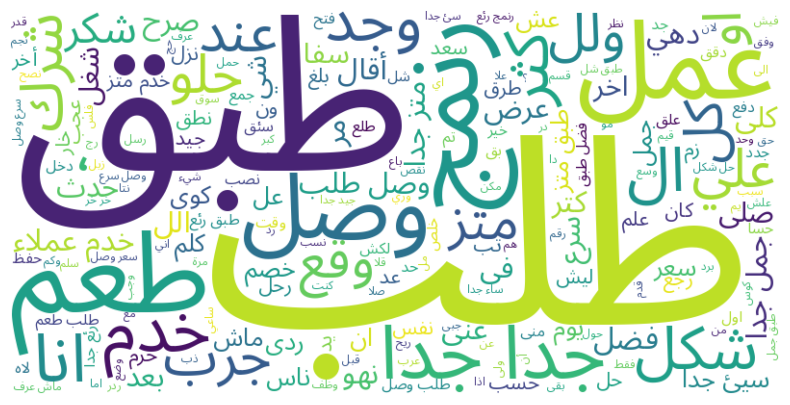

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Remove non-text entries and ensure all entries are strings
clean_text = df['review_description'].dropna().astype(str)

# Combine all cleaned reviews into a single string
text = " ".join(review for review in clean_text)

font_path = 'NotoSansArabic-Regular.ttf'

# Verify font path
print("Font file exists:", os.path.isfile(font_path))

# Create the word cloud with appropriate settings for Arabic text
try:
    wordcloud_arabic = WordCloud(width=800, height=400, background_color ='white',
                                 font_path=font_path,
                                 regexp=r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF]+').generate(text)

    # Display the word cloud for Arabic text
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_arabic, interpolation='bilinear')
    plt.axis("off")
    plt.show()
except Exception as e:
    print("Error occurred:", e)

In [57]:
# Vectorization
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['review_description'])
y = df['rating']

**ML models before resolving imbalance of data**

In [58]:
# Splitting the train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [60]:
# Predict on the test
y_pred = nb_model.predict(X_test)

# Evaluate the classifier
accuracy_nb = accuracy_score(y_test, y_pred)
report_nb = classification_report(y_test, y_pred, target_names=['Positives', 'Neutral', 'Negatives'])
print(f"Accuracy: {accuracy_nb:.2f}")
print(report_nb)

Accuracy: 0.81
              precision    recall  f1-score   support

   Positives       0.79      0.76      0.78      2836
     Neutral       0.20      0.00      0.00       404
   Negatives       0.82      0.91      0.86      4561

    accuracy                           0.81      7801
   macro avg       0.60      0.56      0.55      7801
weighted avg       0.78      0.81      0.79      7801



In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

trained_clf_random_forest = RandomForestClassifier().fit(X_train, y_train)

In [62]:
y_pred = trained_clf_random_forest.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
report_rf = classification_report(y_test, y_pred, target_names=['Positives','Neutral', 'Negatives'])
# Print the accuracy
print("Accuracy of RandomForestClassifier: {:.2f}".format(accuracy_rf))
print(report_rf)

Accuracy of RandomForestClassifier: 0.81
              precision    recall  f1-score   support

   Positives       0.78      0.79      0.79      2836
     Neutral       0.22      0.01      0.03       404
   Negatives       0.83      0.90      0.87      4561

    accuracy                           0.81      7801
   macro avg       0.61      0.57      0.56      7801
weighted avg       0.78      0.81      0.79      7801



In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Making predictions
y_pred = logreg.predict(X_test)

# Evaluating the model
accuracy_lr = accuracy_score(y_test, y_pred)
report_lr = classification_report(y_test, y_pred, target_names=['Positives', 'Neutral', 'Negatives'])

print(f'Accuracy: {accuracy_lr:.2f}')
print(report_lr)

Accuracy: 0.82
              precision    recall  f1-score   support

   Positives       0.82      0.77      0.79      2836
     Neutral       0.15      0.00      0.01       404
   Negatives       0.82      0.92      0.87      4561

    accuracy                           0.82      7801
   macro avg       0.60      0.57      0.56      7801
weighted avg       0.79      0.82      0.80      7801



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



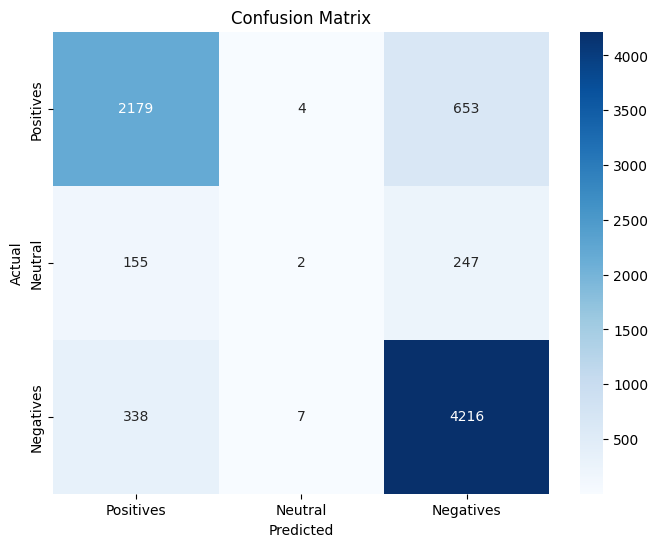

In [68]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positives', 'Neutral', 'Negatives'], yticklabels=['Positives','Neutral', 'Negatives'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**oversampling to resolve the data imbalance**

In [69]:
pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 2.2 MB/s eta 0:00:00


In [70]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [71]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

**ML Models after resolving imbalance**

In [72]:
# Train Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")

Naive Bayes Accuracy: 0.74


In [73]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.88


In [74]:
# Train Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
y_pred_lr = logreg_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

Logistic Regression Accuracy: 0.76


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in enumerate(cm):
        for k, l in enumerate(j):
            plt.text(k, i, format(l, 'd'),
                     horizontalalignment="center",
                     color="white" if l > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix for each model
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_lr = confusion_matrix(y_test, y_pred_lr)

Naive Bayes Confusion Matrix:


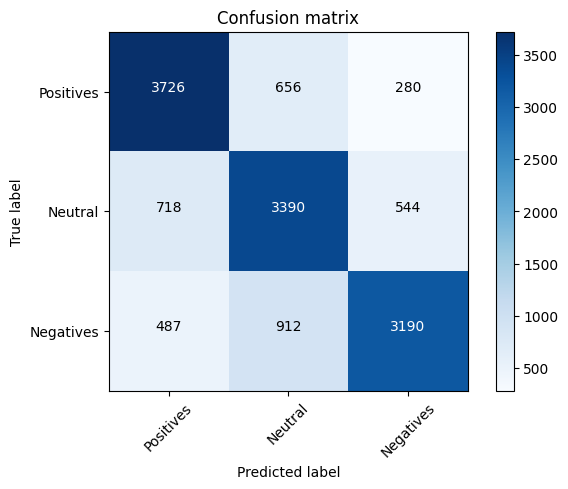

In [76]:
print("Naive Bayes Confusion Matrix:")
plot_confusion_matrix(cm_nb, ['Positives', 'Neutral', 'Negatives'])

Random Forest Confusion Matrix:


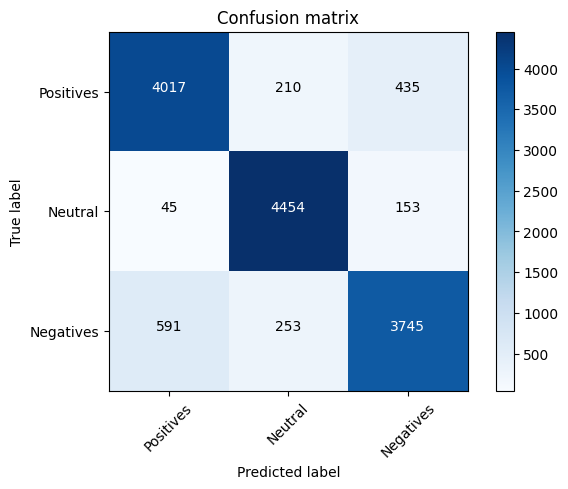

In [77]:
print("Random Forest Confusion Matrix:")
plot_confusion_matrix(cm_rf, ['Positives', 'Neutral', 'Negatives'])

Logistic Regression Confusion Matrix:


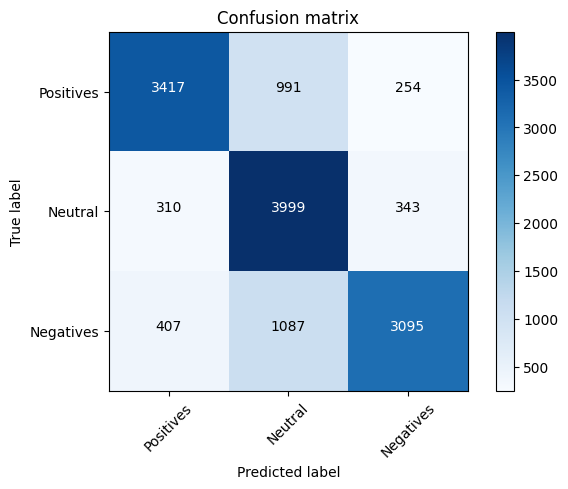

In [78]:
print("Logistic Regression Confusion Matrix:")
plot_confusion_matrix(cm_lr, ['Positives', 'Neutral', 'Negatives'])

In [79]:
# Generate classification reports
report_nb = classification_report(y_test, y_pred_nb, target_names=['Positives', 'Neutral', 'Negatives'], output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, target_names=['Positives', 'Neutral', 'Negatives'], output_dict=True)
report_lr = classification_report(y_test, y_pred_lr, target_names=['Positives', 'Neutral', 'Negatives'], output_dict=True)

In [80]:
# Convert reports to DataFrames for better readability
df_report_nb = pd.DataFrame(report_nb).transpose()
df_report_rf = pd.DataFrame(report_rf).transpose()
df_report_lr = pd.DataFrame(report_lr).transpose()

In [81]:
print("Naive Bayes Classification Report:")
df_report_nb

Naive Bayes Classification Report:


,precision,recall,f1-score,support
Positives,0.755628,0.799228,0.776816,4662.000000
Neutral,0.683743,0.728719,0.705515,4652.000000
Negatives,0.794718,0.695141,0.741602,4589.000000
accuracy,0.741279,0.741279,0.741279,0.741279
macro avg,0.744697,0.741029,0.741311,13903.000000
weighted avg,0.744478,0.741279,0.741335,13903.000000


In [82]:
print("\nRandom Forest Classification Report:")
df_report_rf


Random Forest Classification Report:


,precision,recall,f1-score,support
Positives,0.863314,0.861647,0.862480,4662.000000
Neutral,0.905837,0.957438,0.930923,4652.000000
Negatives,0.864297,0.816082,0.839498,4589.000000
accuracy,0.878659,0.878659,0.878659,0.878659
macro avg,0.877816,0.878389,0.877634,13903.000000
weighted avg,0.877867,0.878659,0.877795,13903.000000


In [83]:
print("\nLogistic Regression Classification Report:")
df_report_lr


Logistic Regression Classification Report:


,precision,recall,f1-score,support
Positives,0.826560,0.732947,0.776944,4662.000000
Neutral,0.658055,0.859630,0.745456,4652.000000
Negatives,0.838299,0.674439,0.747494,4589.000000
accuracy,0.756024,0.756024,0.756024,0.756024
macro avg,0.774305,0.755672,0.756632,13903.000000
weighted avg,0.774052,0.756024,0.756688,13903.000000


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameters grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search initialization
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=3,
                              n_jobs=-1,
                              verbose=1,
                              scoring='accuracy')

In [ ]:
# Fitting grid search
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
# Best estimator
best_rf = grid_search_rf.best_estimator_

In [ ]:
# Predictions using the best settings
y_pred_rf_best = best_rf.predict(X_test)

In [ ]:
# Evaluation
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
report_rf_best = classification_report(y_test, y_pred_rf_best, target_names=['Positives', 'Neutral', 'Negatives'])
accuracy_rf_best

0.8804574552254909

In [ ]:
# Add evaluations for Naive Bayes and Logistic Regression
report_nb_df = pd.DataFrame(classification_report(y_test, y_pred_nb, output_dict=True)).transpose()
report_lr_df = pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True)).transpose()
report_rf_best_df = pd.DataFrame(classification_report(y_test, y_pred_rf_best, output_dict=True)).transpose()

# Collecting summary data
summary_data = {
    'Model': ['Naive Bayes', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [report_nb_df.loc['accuracy', 'precision'],
                 report_lr_df.loc['accuracy', 'precision'],
                 report_rf_best_df.loc['accuracy', 'precision']],
    'Precision_Macro': [report_nb_df.loc['macro avg', 'precision'],
                        report_lr_df.loc['macro avg', 'precision'],
                        report_rf_best_df.loc['macro avg', 'precision']],
    'Recall_Macro': [report_nb_df.loc['macro avg', 'recall'],
                     report_lr_df.loc['macro avg', 'recall'],
                     report_rf_best_df.loc['macro avg', 'recall']],
    'F1_Macro': [report_nb_df.loc['macro avg', 'f1-score'],
                 report_lr_df.loc['macro avg', 'f1-score'],
                 report_rf_best_df.loc['macro avg', 'f1-score']]
}

comparison_df = pd.DataFrame(summary_data)
print(comparison_df)

                 Model  Accuracy  Precision_Macro  Recall_Macro  F1_Macro
0          Naive Bayes  0.741279         0.744697      0.741029  0.741311
1  Logistic Regression  0.756024         0.774305      0.755672  0.756632
2        Random Forest  0.880457         0.879625      0.880196  0.879501


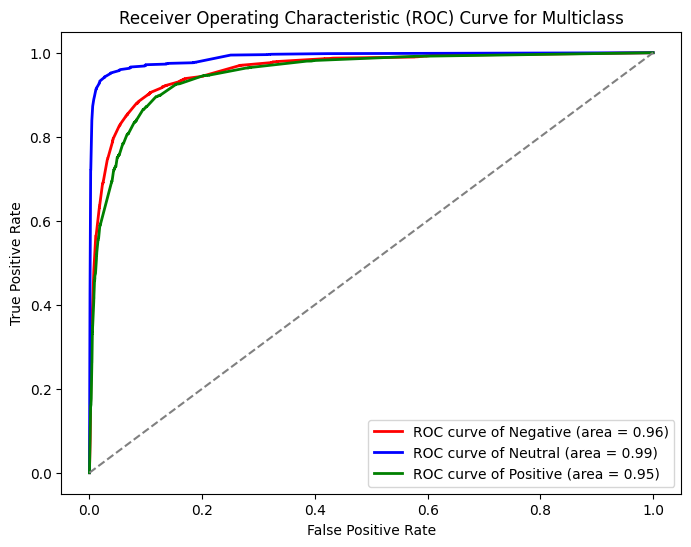

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import learning_curve

# ROC Curve
y_prob = rf_model.predict_proba(X_test)

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[-1, 0, 1])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
class_labels = ['Negative', 'Neutral', 'Positive']
for i, color, label in zip(range(n_classes), colors, class_labels):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of {label} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to co

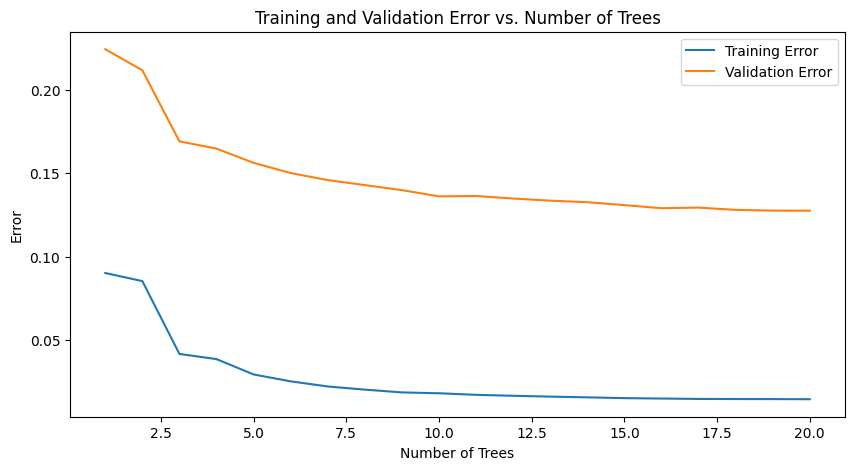

In [85]:
train_errors = []
test_errors = []
n_estimators = 20

for i in range(1, n_estimators + 1):
    # Train model
    rf_model = RandomForestClassifier(n_estimators=i, random_state=42, oob_score=True if i > 1 else False)
    rf_model.fit(X_train, y_train)

    # Predict on training and test data
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)

    # Calculate training and test errors
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store accuracies
    train_errors.append(1 - train_accuracy)
    test_errors.append(1 - test_accuracy)

# Plotting the curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_estimators + 1), train_errors, label='Training Error')
plt.plot(range(1, n_estimators + 1), test_errors, label='Validation Error')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.title('Training and Validation Error vs. Number of Trees')
plt.legend()
plt.show()

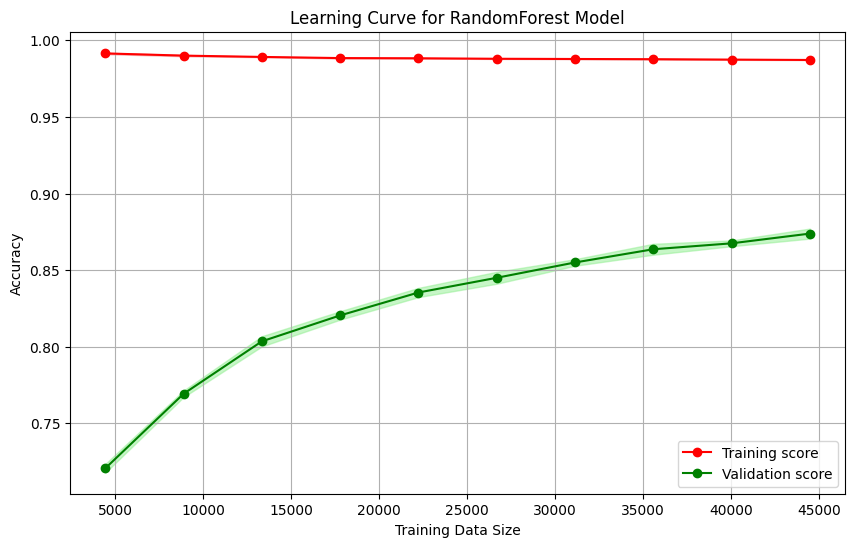

In [92]:
# Initialize the model with the same parameters
model = RandomForestClassifier(random_state=42)

# Configure the learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 different sizes of the training set
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Evaluate the accuracy
    n_jobs=-1  # Use all processors
)

# Mean and standard deviation of training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Mean and standard deviation of validation scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plotting the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='red', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lightcoral', alpha=0.5)

plt.plot(train_sizes, validation_mean, label='Validation score', color='green', marker='o')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='lightgreen', alpha=0.5)

plt.title('Learning Curve for RandomForest Model')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Classify new review
new_text = " وصلني الطعام متأخرا والاكل بارد"

# Remove emojis from the new review
new_text = demoji.replace(new_text, '')

# Remove punctuation from the new review
new_text = ''.join(char for char in new_text if char not in string.punctuation)

# Tokenize the new review
new_text = word_tokenize(new_text)

# Remove stop words from the new review
new_text = [word for word in new_text if word not in stop_words]

# Normalize the new review (stemming)
new_text = [stemmer.stem(word) for word in new_text]

new_text = ' '.join(new_text)

# Transform the new text using TF-IDF
new_text = tfidf_vectorizer.transform([new_text])

predicted_class = rf_model.predict(new_text)

if predicted_class == 1:
  print("Predicted Label: Positive")
elif predicted_class== -1 :
  print("Predicted Label: Negative")
else:
  print("Predicted Label: Neutral")

Predicted Label: Negative


In [ ]:
# Classify new review
new_text = " أفضل تطبيق"

# Remove emojis from the new review
new_text = demoji.replace(new_text, '')

# Remove punctuation from the new review
new_text = ''.join(char for char in new_text if char not in string.punctuation)

# Tokenize the new review
new_text = word_tokenize(new_text)

# Remove stop words from the new review
new_text = [word for word in new_text if word not in stop_words]

# Normalize the new review (stemming)
new_text = [stemmer.stem(word) for word in new_text]

new_text = ' '.join(new_text)

# Transform the new text using TF-IDF
new_text = tfidf_vectorizer.transform([new_text])

predicted_class = rf_model.predict(new_text)

if predicted_class == 1:
  print("Predicted Label: Positive")
elif predicted_class== -1 :
  print("Predicted Label: Negative")
else:
  print("Predicted Label: Neutral")

Predicted Label: Positive


In [91]:
# Classify new review
new_text = " ليس سيء و ليس جيد "

# Remove emojis from the new review
new_text = demoji.replace(new_text, '')

# Remove punctuation from the new review
new_text = ''.join(char for char in new_text if char not in string.punctuation)

# Tokenize the new review
new_text = word_tokenize(new_text)

# Remove stop words from the new review
new_text = [word for word in new_text if word not in stop_words]

# Normalize the new review (stemming)
new_text = [stemmer.stem(word) for word in new_text]

new_text = ' '.join(new_text)

# Transform the new text using TF-IDF
new_text = tfidf_vectorizer.transform([new_text])

predicted_class = rf_model.predict(new_text)

if predicted_class == 1:
  print("Predicted Label: Positive")
elif predicted_class== -1 :
  print("Predicted Label: Negative")
else:
  print("Predicted Label: Neutral")

Predicted Label: Neutral


In [105]:
# Classify new review
new_text = "مش عارف"
# Remove emojis from the new review
new_text = demoji.replace(new_text, '')

# Remove punctuation from the new review
new_text = ''.join(char for char in new_text if char not in string.punctuation)

# Tokenize the new review
new_text = word_tokenize(new_text)

# Remove stop words from the new review
new_text = [word for word in new_text if word not in stop_words]

# Normalize the new review (stemming)
new_text = [stemmer.stem(word) for word in new_text]

new_text = ' '.join(new_text)

# Transform the new text using TF-IDF
new_text = tfidf_vectorizer.transform([new_text])

predicted_class = rf_model.predict(new_text)

if predicted_class == 1:
  print("Predicted Label: Positive")
elif predicted_class== -1 :
  print("Predicted Label: Negative")
else:
  print("Predicted Label: Neutral")

Predicted Label: Neutral


In [114]:
# Classify new review
new_text = " تأخر الأكل"
# Remove emojis from the new review
new_text = demoji.replace(new_text, '')

# Remove punctuation from the new review
new_text = ''.join(char for char in new_text if char not in string.punctuation)

# Tokenize the new review
new_text = word_tokenize(new_text)

# Remove stop words from the new review
new_text = [word for word in new_text if word not in stop_words]

# Normalize the new review (stemming)
new_text = [stemmer.stem(word) for word in new_text]

new_text = ' '.join(new_text)

# Transform the new text using TF-IDF
new_text = tfidf_vectorizer.transform([new_text])

predicted_class = rf_model.predict(new_text)

if predicted_class == 1:
  print("Predicted Label: Positive")
elif predicted_class== -1 :
  print("Predicted Label: Negative")
else:
  print("Predicted Label: Neutral")

Predicted Label: Negative


In [115]:
# Classify new review
new_text = "تجربة ممتازة"
# Remove emojis from the new review
new_text = demoji.replace(new_text, '')

# Remove punctuation from the new review
new_text = ''.join(char for char in new_text if char not in string.punctuation)

# Tokenize the new review
new_text = word_tokenize(new_text)

# Remove stop words from the new review
new_text = [word for word in new_text if word not in stop_words]

# Normalize the new review (stemming)
new_text = [stemmer.stem(word) for word in new_text]

new_text = ' '.join(new_text)

# Transform the new text using TF-IDF
new_text = tfidf_vectorizer.transform([new_text])

predicted_class = rf_model.predict(new_text)

if predicted_class == 1:
  print("Predicted Label: Positive")
elif predicted_class== -1 :
  print("Predicted Label: Negative")
else:
  print("Predicted Label: Neutral")

Predicted Label: Positive
